<a href="https://colab.research.google.com/github/MalihehMaleki/Machinelearning2023/blob/main/Miniproject2/miniproject2_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

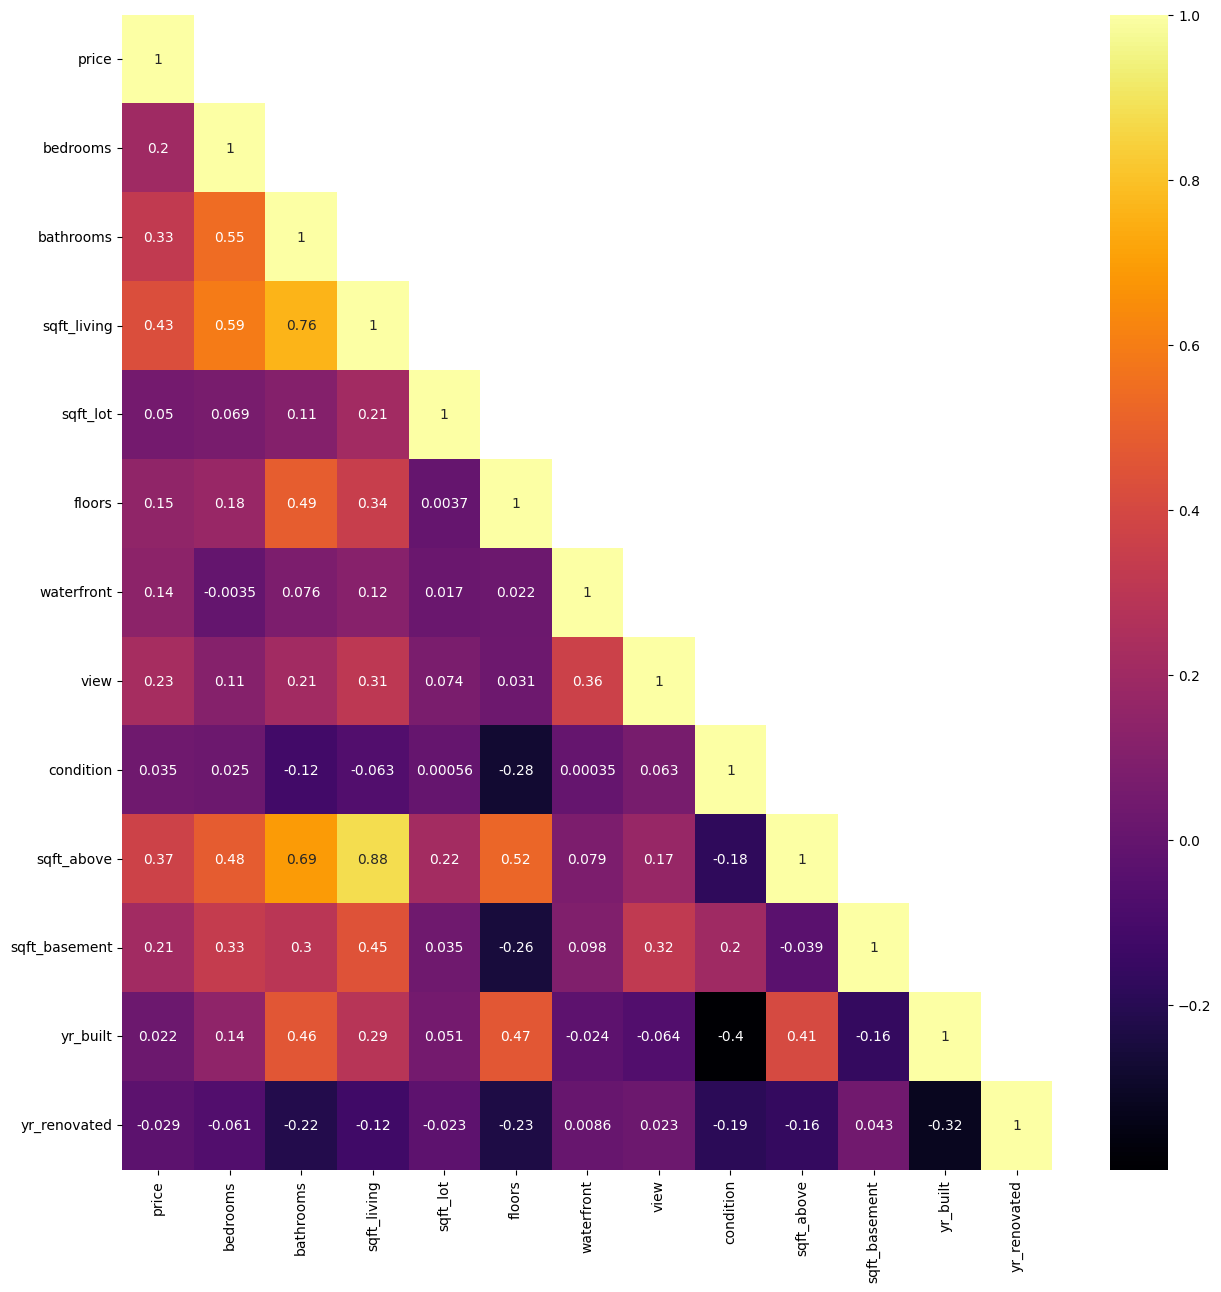

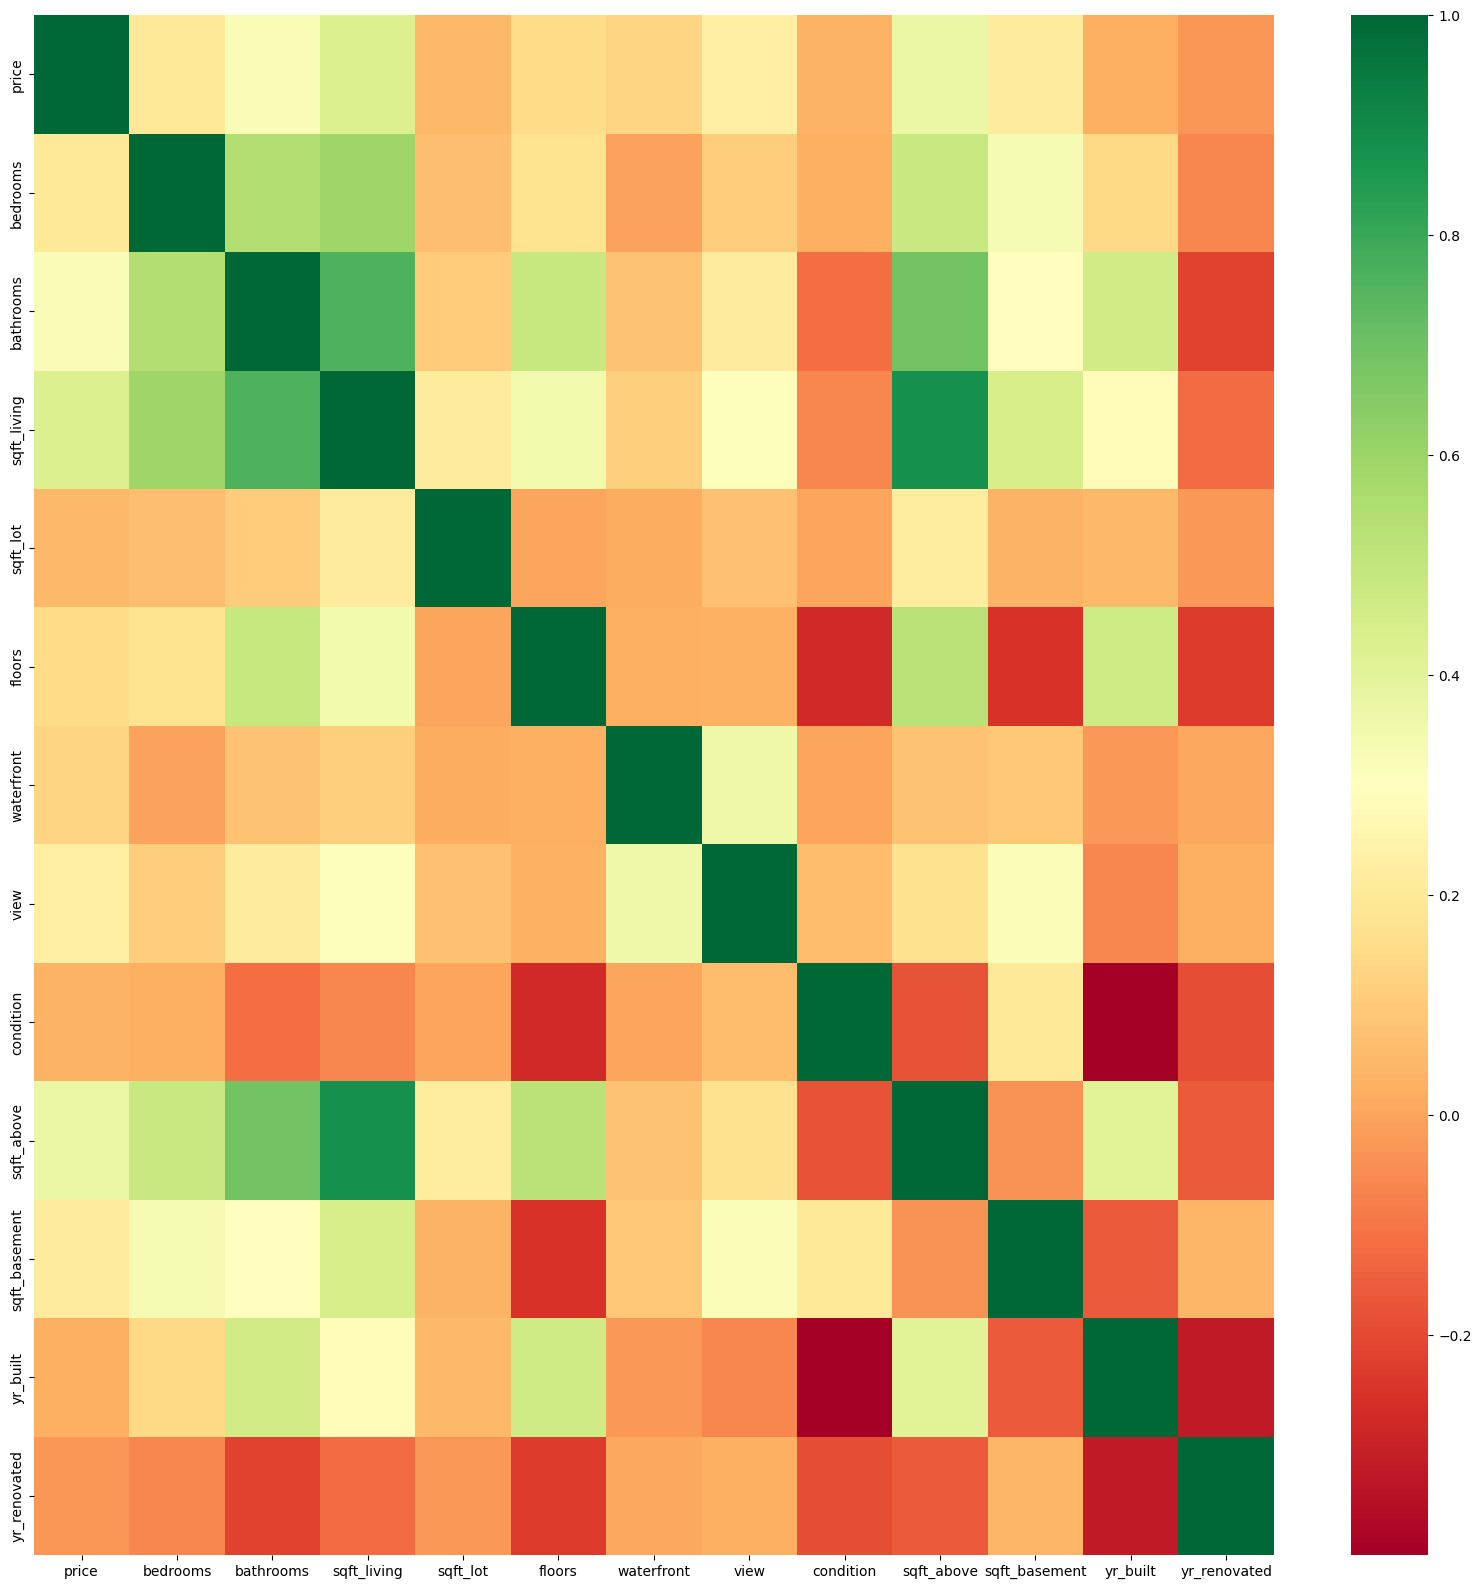

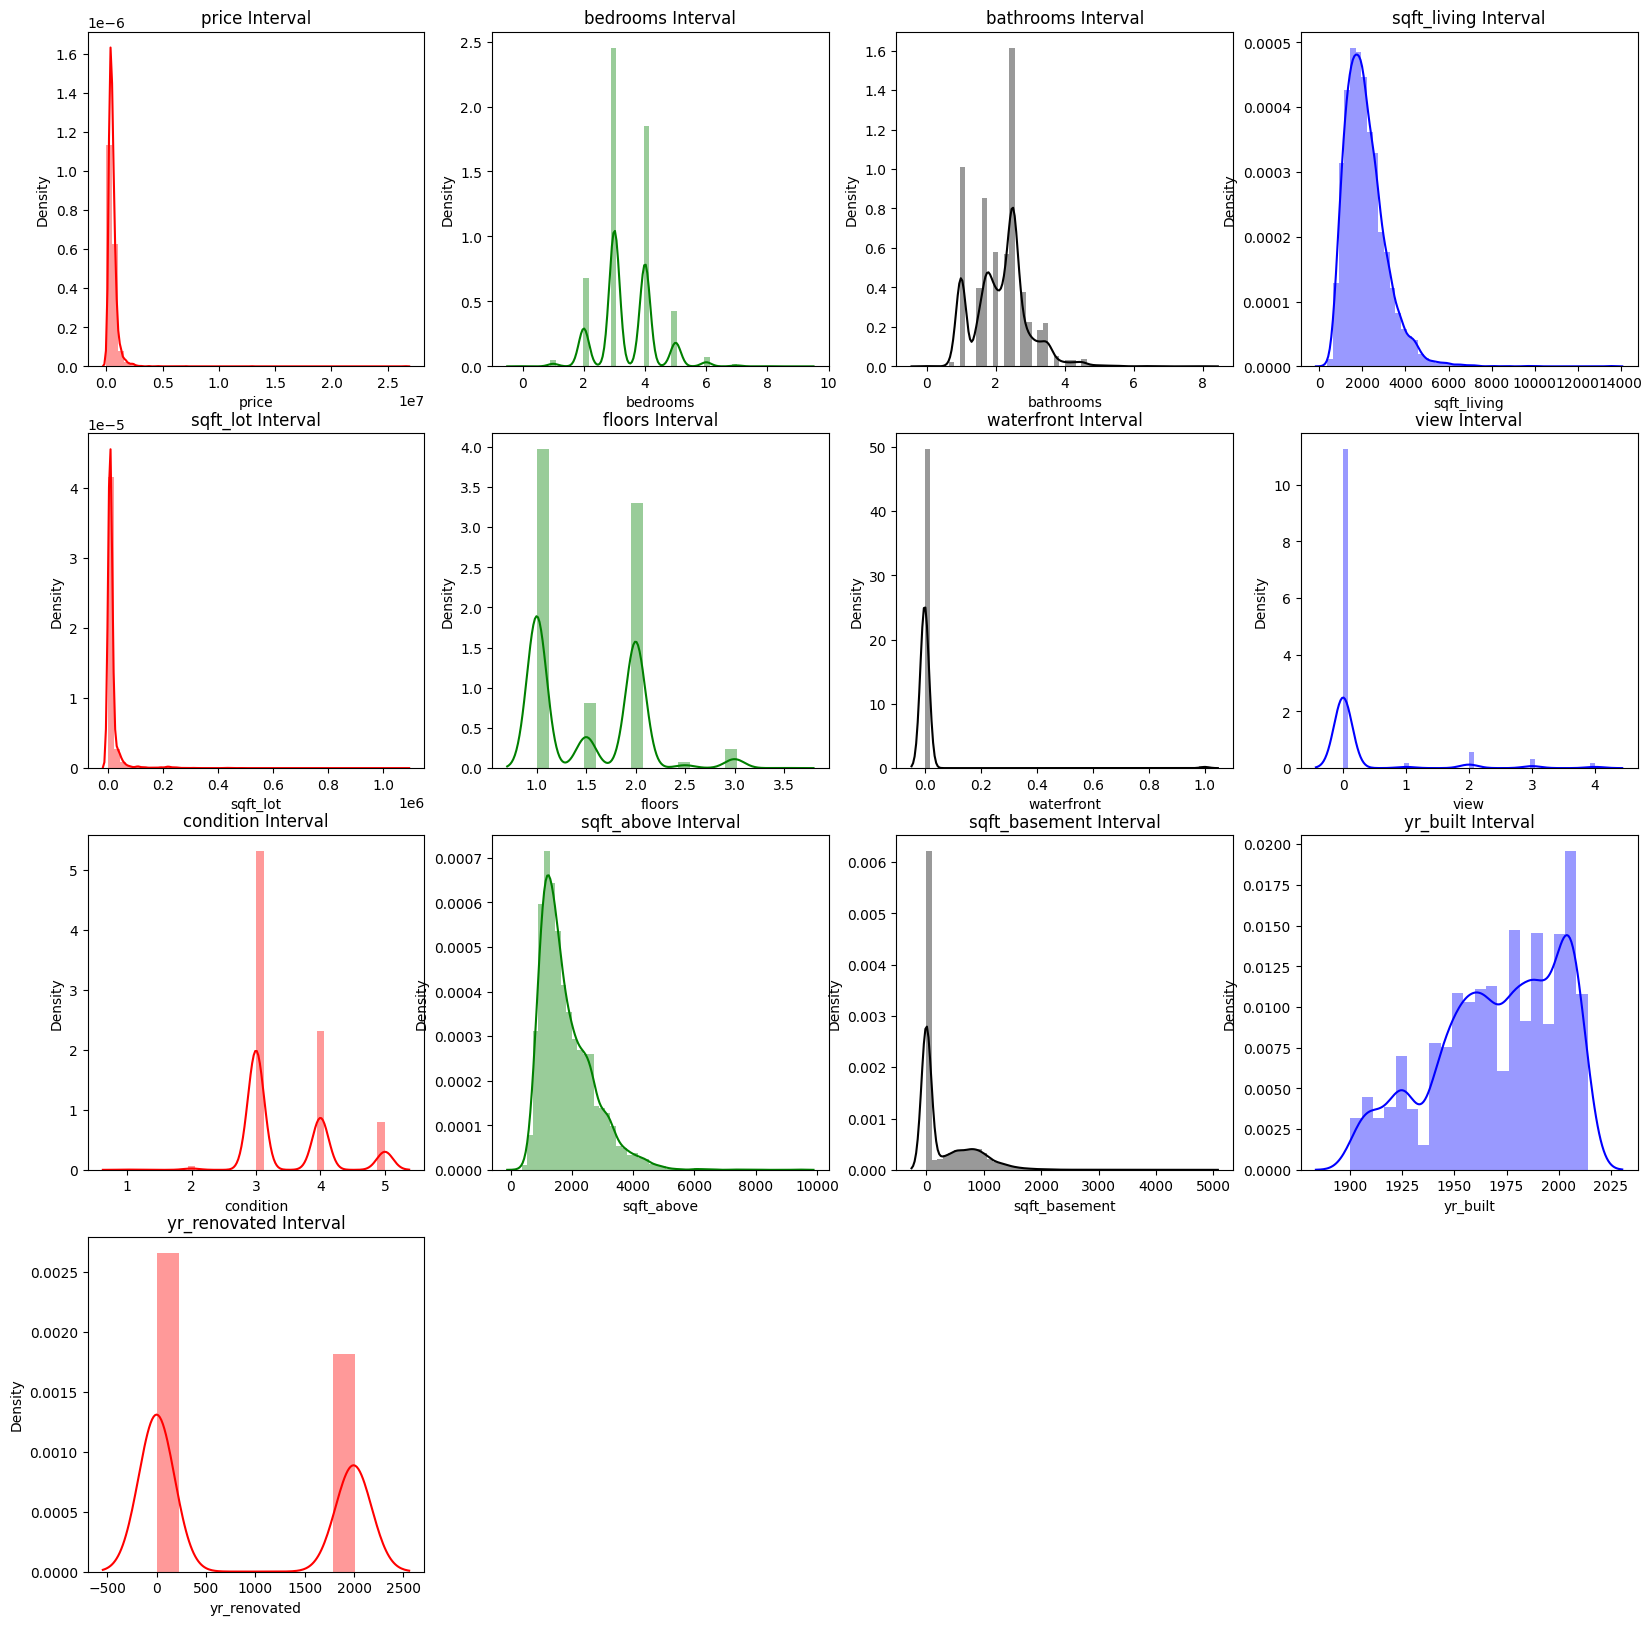

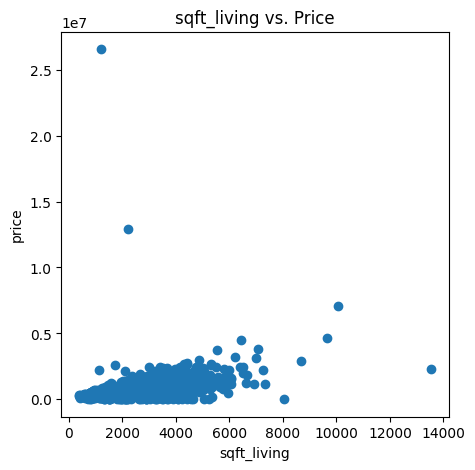

X Train Scaler :  (3680, 59)
X Test Scaler :  (920, 59)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


NotFittedError: ignored

In [ ]:
#miniproject2
# question 4 / part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/data.csv')
data.head()

data.isnull().sum()
data.dropna(inplace=True)

num = data.select_dtypes(exclude=['object']).columns
num

# part 2
plt.figure(figsize=(15, 15))
sns.heatmap(data[num].corr(), annot=True, cmap='inferno', mask=np.triu(data[num].corr(), k=1))

correlation_matrix = data.corr()['price'].sort_values(ascending=False)
correlation_matrix

plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap="RdYlGn")
plt.show()


# part 3
plt.figure(figsize=(20, 20))

plt.subplot(4,4,1)
sns.distplot(data['price'], color="red").set_title('price Interval')

plt.subplot(4,4,2)
sns.distplot(data['bedrooms'], color="green").set_title('bedrooms Interval')

plt.subplot(4,4,3)
sns.distplot(data['bathrooms'], color="black").set_title('bathrooms Interval')
plt.subplot(4,4,4)
sns.distplot(data['sqft_living'], color="blue").set_title('sqft_living Interval')

plt.subplot(4,4,5)
sns.distplot(data['sqft_lot'], color="red").set_title('sqft_lot Interval')

plt.subplot(4,4,6)
sns.distplot(data['floors'], color="green").set_title('floors Interval')

plt.subplot(4,4,7)
sns.distplot(data['waterfront'], color="black").set_title('waterfront Interval')

plt.subplot(4,4,8)
sns.distplot(data['view'], color="blue").set_title('view Interval')

plt.subplot(4,4,9)
sns.distplot(data['condition'], color="red").set_title('condition Interval')

plt.subplot(4,4,10)
sns.distplot(data['sqft_above'], color="green").set_title('sqft_above Interval')

plt.subplot(4,4,11)
sns.distplot(data['sqft_basement'], color="black").set_title('sqft_basement Interval')

plt.subplot(4,4,12)
sns.distplot(data['yr_built'], color="blue").set_title('yr_built Interval')

plt.subplot(4,4,13)
sns.distplot(data['yr_renovated'], color="red").set_title('yr_renovated Interval')

plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=data)
plt.xlabel('sqft_living')
plt.title('sqft_living vs. Price')
plt.ylabel('price')
plt.show()

#part 4
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

data = data[['year', 'month'] + [col for col in data.columns if col not in ['year', 'month']]]

data = data.drop(['date'], axis=1)
data
data = data.drop(['year'], axis=1)
data
dummy = ['city']
df2 = pd.get_dummies(data, columns=dummy, drop_first=True)
df2.head()

#part 5
x = df2.drop(["price"], axis=1)
y = df2["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=83, shuffle=True)

print("X Train Scaler : ", x_train.shape)
print("X Test Scaler : ",  x_test.shape)
print("Y Train Scaler : ", y_train.shape)
print("Y Test Scaler : ",  y_test.shape)

scaler_1 = MinMaxScaler()
x_train = scaler_1.fit_transform(x_train)
x_test = scaler_1.transform(x_test)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler_2 = MinMaxScaler()
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

#part 6
model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(1, activation='linear'))
model_3.summary()
model_3.compile(optimizer='adam', loss='mse')

x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=83, shuffle=True)

history = model_3.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=0)


loss = model_3.evaluate(x_test , y_test)

y_pred_3_train = model_3.predict(x_train1)
y_pred_3_val = model_3.predict(x_val)

rscore_train = r2_score(y_train1, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

y_pred_3_test = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()

random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_train))
  random_pred.append(y_pred_3_train[i])
  random_test.append(y_test[i])

plt.plot(random_pred, 'b', label='Prediction')
plt.plot(random_test, 'r', label='Test')

plt.legend()
plt.grid()
plt.show()

random_pred = list()
random_test = list()

for i in range(5):
  j = random.randint(0, len(y_pred_3_test))
  random_pred.append(y_pred_3_test[i])
  random_test.append(y_test[i])

plt.plot(random_pred, 'b', label='Prediction')
plt.plot(random_test, 'r', label='Test')
plt.legend()
plt.grid()
plt.show()

